In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
grouped_df = df.groupby('Branch')

df[['tax_branch_mean','unit_price_mean']] = grouped_df[['Tax 5%', 'Unit price']].transform('mean')

df[['tax_branch_std','unit_price_std']] = grouped_df[['Tax 5%', 'Unit price']].transform('std')

df[['product_count','gender_count']] = grouped_df[['Product line', 'Gender']].transform('count')

In [4]:
df[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,A,14.874001,54.780853,11.030477,26.132127,340,340
1,C,16.052367,56.609024,12.531470,27.179799,328,328
2,A,14.874001,54.780853,11.030477,26.132127,340,340
3,A,14.874001,54.780853,11.030477,26.132127,340,340
4,A,14.874001,54.780853,11.030477,26.132127,340,340
5,C,16.052367,56.609024,12.531470,27.179799,328,328
6,A,14.874001,54.780853,11.030477,26.132127,340,340
7,C,16.052367,56.609024,12.531470,27.179799,328,328
8,A,14.874001,54.780853,11.030477,26.132127,340,340
9,B,15.232024,55.659277,11.545122,26.224559,332,332


In [5]:
df[['Tax 5%', 'Unit price', 'Branch', 'tax_branch_mean', 'unit_price_mean']]

,Tax 5%,Unit price,Branch,tax_branch_mean,unit_price_mean
0,26.1415,74.69,A,14.874001,54.780853
1,3.8200,15.28,C,16.052367,56.609024
2,16.2155,46.33,A,14.874001,54.780853
3,23.2880,58.22,A,14.874001,54.780853
4,30.2085,86.31,A,14.874001,54.780853
...,...,...,...,...,...
995,2.0175,40.35,C,16.052367,56.609024
996,48.6900,97.38,B,15.232024,55.659277
997,1.5920,31.84,A,14.874001,54.780853
998,3.2910,65.82,A,14.874001,54.780853


In [6]:
df['unit_price_50'] = np.where(df['Unit price'] > 50, 1, 0)
df['unit_price_50 * qty'] = df['unit_price_50'] * df['Quantity']

In [7]:
df[['unit_price_50', 'unit_price_50 * qty']].head()

,unit_price_50,unit_price_50 * qty
0,1,7
1,0,0
2,0,0
3,1,8
4,1,7


In [10]:
df['log_cogs'] = np.log(df['cogs'] + 1)
df['gross income squared'] = np.square(df['gross income'])

In [11]:
df[['cogs', 'log_cogs', 'gross income', 'gross income squared']].head()

,cogs,log_cogs,gross income,gross income squared
0,522.83,6.261167,26.1415,683.378022
1,76.40,4.348987,3.8200,14.592400
2,324.31,5.784779,16.2155,262.942440
3,465.76,6.145815,23.2880,542.330944
4,604.17,6.405509,30.2085,912.553472


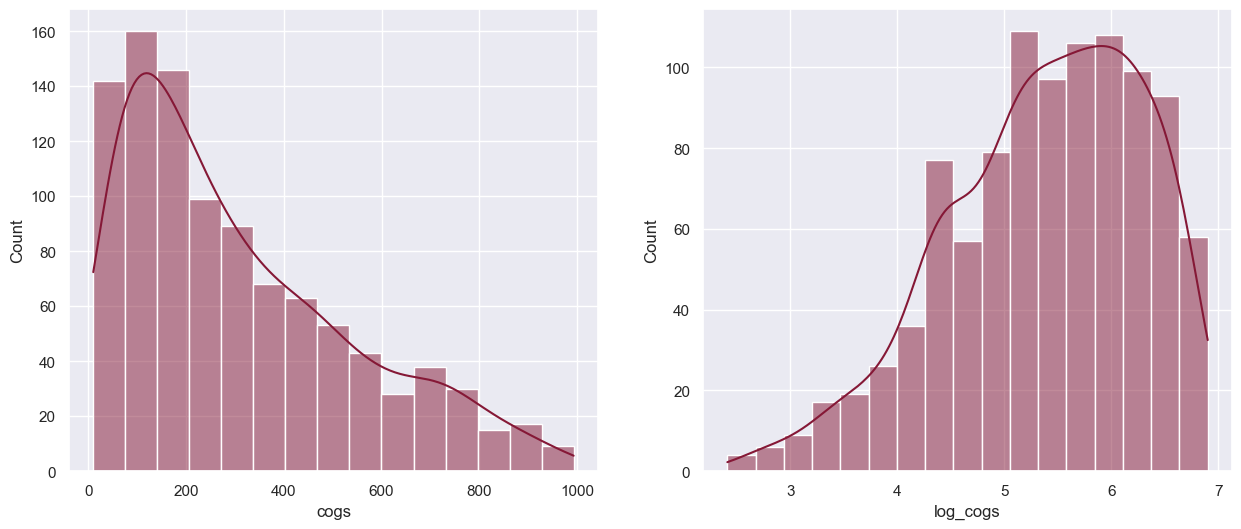

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['cogs'], ax=ax1, kde=True)
sns.histplot(df['log_cogs'], ax=ax2, kde=True);

In [13]:
def plot_hist(data1, data2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data1, ax=ax1, kde=True)
    sns.histplot(data2, ax=ax2, kde=True);

Gross income range: 0.5085 to 49.65
Rating range: 4.0 to 10.0


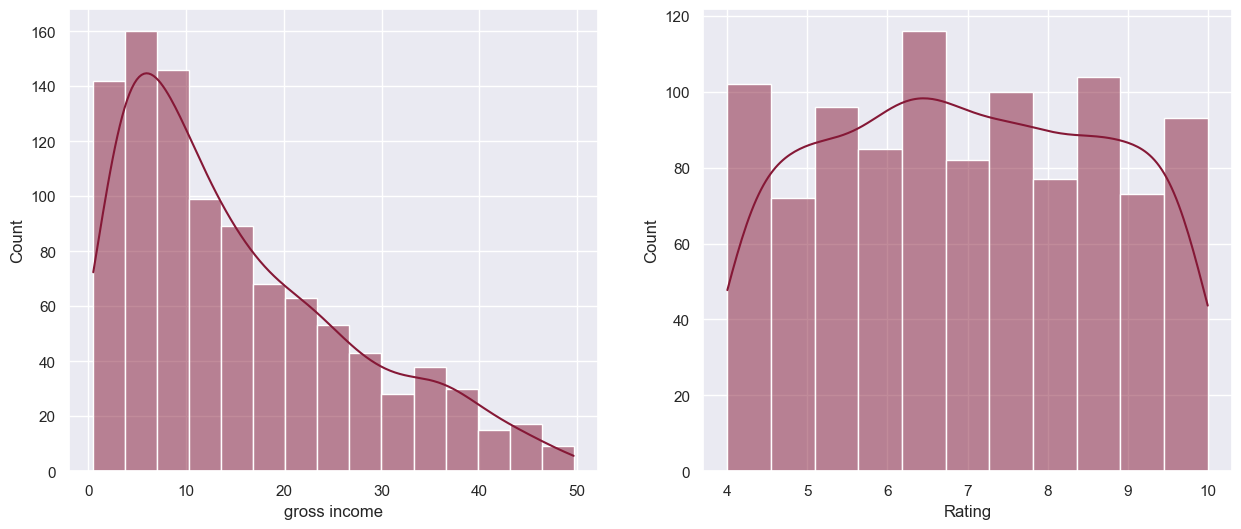

In [14]:
gincome = df["gross income"]
rating = df["Rating"]

print(f'Gross income range: {gincome.min()} to {gincome.max()}')
print(f'Rating range: {rating.min()} to {rating.max()}')

plot_hist(gincome, rating)

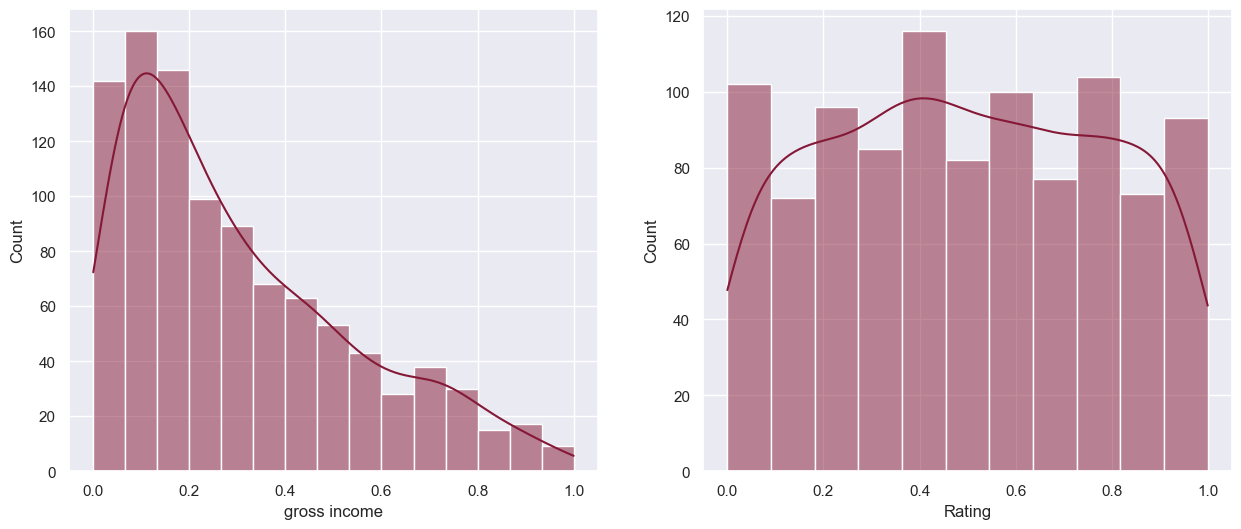

In [15]:
df[["gross income", "Rating"]] = MinMaxScaler().fit_transform(df[["gross income", "Rating"]])

plot_hist(df['gross income'], df['Rating'])

In [16]:
pd.get_dummies(df[['Gender','Payment']]).head()

,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,1
1,1,0,1,0,0
2,0,1,0,1,0
3,0,1,0,0,1
4,0,1,0,0,1


In [17]:
target = [1, 4, 5, 6]
predictor = ['a', 'b', 'a', 'b']

target_enc_df = pd.DataFrame(data={'target':target, 'predictor':predictor})

means = target_enc_df.groupby('predictor')['target'].mean()

target_enc_df['predictor_encoded'] = target_enc_df['predictor'].map(means)

target_enc_df

,target,predictor,predictor_encoded
0,1,a,3.0
1,4,b,5.0
2,5,a,3.0
3,6,b,5.0


In [18]:
means = df.groupby('Product line')['Rating'].mean()

df['Product line target encoded'] = df['Product line'].map(means)
df[['Product line','Product line target encoded','Rating']]

,Product line,Product line target encoded,Rating
0,Health and beauty,0.500548,0.850000
1,Electronic accessories,0.487451,0.933333
2,Home and lifestyle,0.472917,0.566667
3,Health and beauty,0.500548,0.733333
4,Sports and travel,0.486044,0.216667
...,...,...,...
995,Health and beauty,0.500548,0.366667
996,Home and lifestyle,0.472917,0.066667
997,Food and beverages,0.518870,0.616667
998,Home and lifestyle,0.472917,0.016667


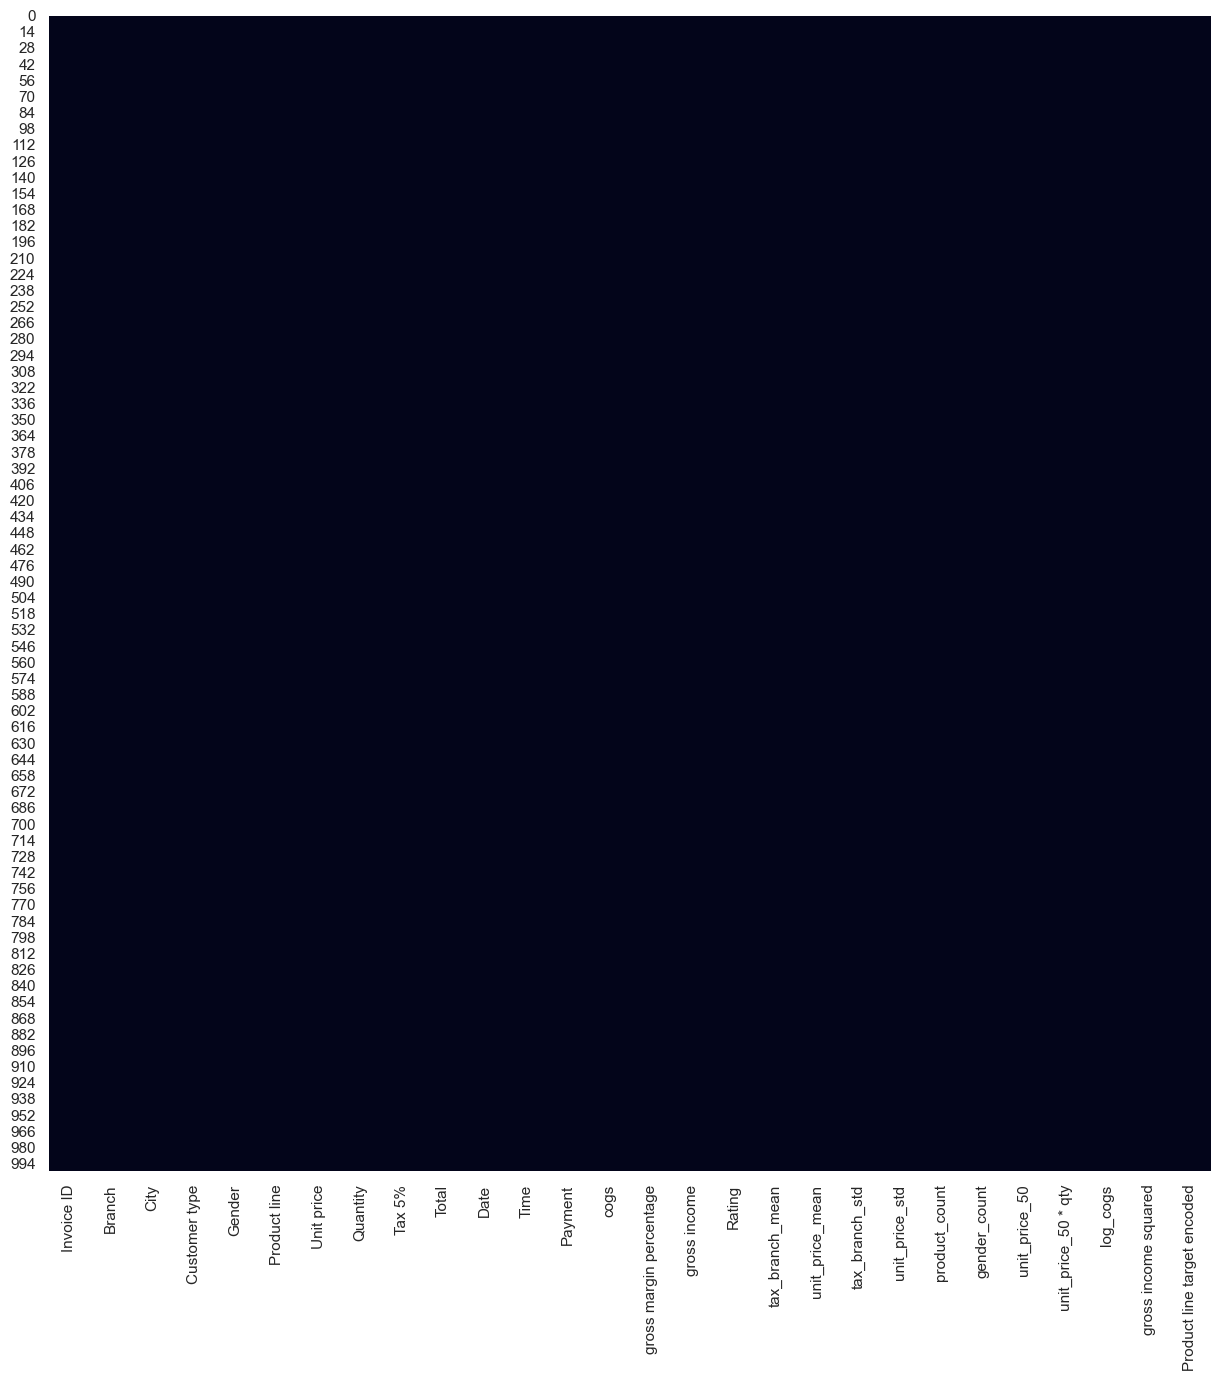

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

In [20]:
threshold = 0.7

# Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

# Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

In [21]:
# Filling missing values with medians of the columns
df = df.fillna(df.median())

# Fill remaining columns - categorical columns - with mode
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_17180\2923988789.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


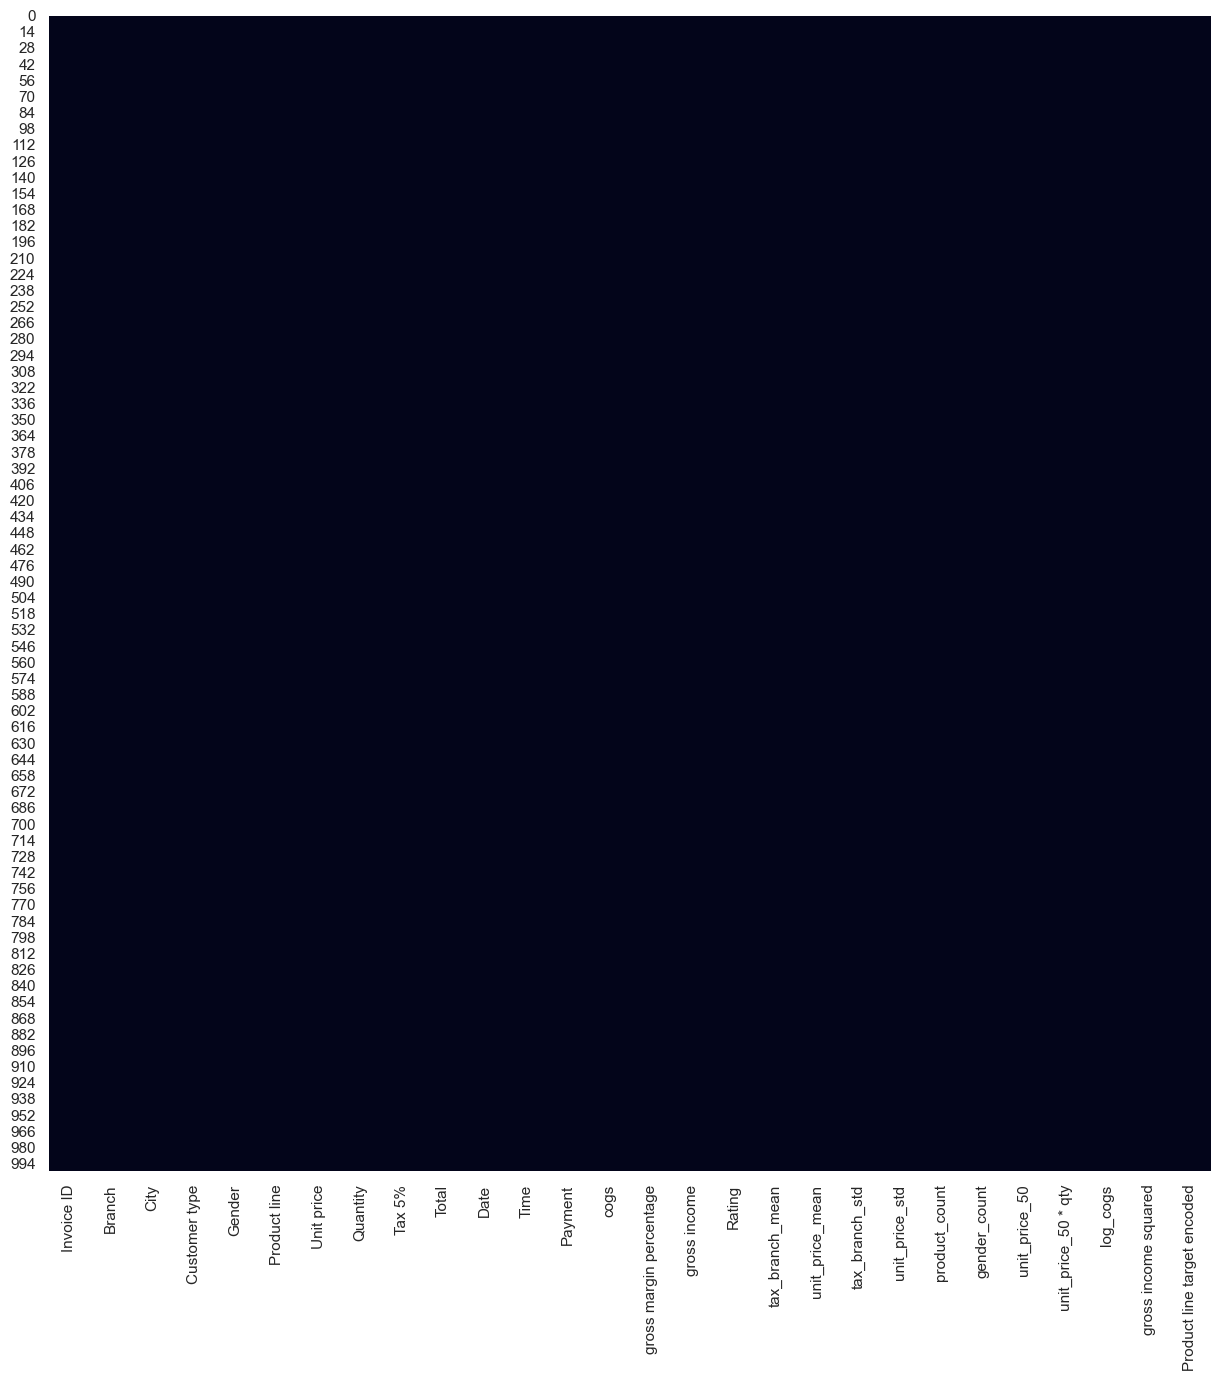

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

In [23]:
# Convert to datetime object
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [24]:
# Decomposition
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df[['Year','Month','Day']].head()

,Year,Month,Day
0,2019,1,5
1,2019,3,8
2,2019,3,3
3,2019,1,27
4,2019,2,8
